In [1]:
import pandas as pd
import numpy
import matplotlib as plt
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt	
import seaborn as sns
import folium
import re

# 명사추출
from konlpy.tag import Twitter
from konlpy.tag import Kkma

# 워드클라우드
from wordcloud import WordCloud

In [9]:
df =pd.read_csv('./부산데이트_유튜브.csv',encoding='utf-8')

In [10]:
df['title'].str[0:]

0      부산여행 필수코스 18곳 | 부산시민은 알고 관광객만 모르는💡야경 스팟 & 부산 갈...
1      부산여행 완전정복 !  권역별로 꼭 가봐야하는 부산여행지 23곳 추천, 야경명소, ...
2      22년~23년 부산여행을 가장 잘하는 방법! 이 영상 하나만 보면 해결됩니다! 꼭 ...
3                      부산 주요핫플 총정리💥 Busan Travel Ι 부산여행👍
4      부산 뚜벅이 하루 여행코스 Best 8✨부산 가볼만한곳💡국내여행 & 데이트코스 추천...
                             ...                        
602                        김해로 이사온 '금이'와 '관이'…내년에 새끼 낳을까
603                                  부산 여행 숨은 명소_동백섬 둘레길
604                                     부산아파트 분양 다대양우내안애
605    나는솔로10기 예고편 2대1 데이트 논란 폭발! 망했다! "영호님, 차에서 내려줄래...
606    [2022년 10월 30일 일요일 장소 부산아시아드주경기장] 2022 부산원아시아페...
Name: title, Length: 607, dtype: object

In [11]:
df['title']= df['title'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df['title']=df["title"].map(lambda x : (re.sub(' +', ' ', x)))

In [12]:
df

,title
0,부산여행 필수코스 18곳 부산시민은 알고 관광객만 모르는 야경 스팟 부산 갈 때 마...
1,부산여행 완전정복 권역별로 꼭 가봐야하는 부산여행지 23곳 추천 야경명소 부산카페 ...
2,22년 23년 부산여행을 가장 잘하는 방법 이 영상 하나만 보면 해결됩니다 꼭 봐야...
3,부산 주요핫플 총정리 Busan Travel Ι 부산여행
4,부산 뚜벅이 하루 여행코스 Best 8 부산 가볼만한곳 국내여행 데이트코스 추천 해...
...,...
602,김해로 이사온 금이 와 관이 내년에 새끼 낳을까
603,부산 여행 숨은 명소_동백섬 둘레길
604,부산아파트 분양 다대양우내안애
605,나는솔로10기 예고편 2대1 데이트 논란 폭발 망했다 영호님 차에서 내려줄래요 영호...


In [13]:
df['title'].to_csv('./부산데이트_split.csv',encoding='utf-8',index=False)

In [14]:
df['title'].str.split(' ',expand=True)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,부산여행,필수코스,18곳,부산시민은,알고,관광객만,모르는,야경,스팟,부산,...,곳들,카카오맵,여행지도,공유,,None,None,None,None,None
1,부산여행,완전정복,권역별로,꼭,가봐야하는,부산여행지,23곳,추천,야경명소,부산카페,...,Travel,None,None,None,None,None,None,None,None,None
2,22년,23년,부산여행을,가장,잘하는,방법,이,영상,하나만,보면,...,부산,신상여행지,부터,야경,일몰명소,핫플레이스,까지,None,None,None
3,부산,주요핫플,총정리,Busan,Travel,Ι,부산여행,,None,None,...,None,None,None,None,None,None,None,None,None,None
4,부산,뚜벅이,하루,여행코스,Best,8,부산,가볼만한곳,국내여행,데이트코스,...,더베이101,,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,김해로,이사온,금이,와,관이,내년에,새끼,낳을까,None,None,...,None,None,None,None,None,None,None,None,None,None
603,부산,여행,숨은,명소_동백섬,둘레길,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
604,부산아파트,분양,다대양우내안애,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
605,나는솔로10기,예고편,2대1,데이트,논란,폭발,망했다,영호님,차에서,내려줄래요,...,때문에,영철과,현숙이,서로,오해,,None,None,None,None


In [16]:
# 파일로드
data = pd.read_csv('./부산데이트_split.csv',encoding='utf-8')
data = data['title']

In [17]:
data

0      부산여행 필수코스 18곳 부산시민은 알고 관광객만 모르는 야경 스팟 부산 갈 때 마...
1      부산여행 완전정복 권역별로 꼭 가봐야하는 부산여행지 23곳 추천 야경명소 부산카페 ...
2      22년 23년 부산여행을 가장 잘하는 방법 이 영상 하나만 보면 해결됩니다 꼭 봐야...
3                       부산 주요핫플 총정리 Busan Travel Ι 부산여행 
4      부산 뚜벅이 하루 여행코스 Best 8 부산 가볼만한곳 국내여행 데이트코스 추천 해...
                             ...                        
602                           김해로 이사온 금이 와 관이 내년에 새끼 낳을까
603                                  부산 여행 숨은 명소_동백섬 둘레길
604                                     부산아파트 분양 다대양우내안애
605    나는솔로10기 예고편 2대1 데이트 논란 폭발 망했다 영호님 차에서 내려줄래요 영호...
606     2022년 10월 30일 일요일 장소 부산아시아드주경기장 2022 부산원아시아페스...
Name: title, Length: 607, dtype: object

In [18]:
# 데이터가져오기
f = open("./부산데이트_split.csv",'rt',encoding='utf-8')
lines = f.readlines() # 한 줄을가져와서 문자열 변환
line = []
for i in range(len(lines)):
    line.append(lines[i])
f.close()

# print(line)

In [19]:
compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
for i in range(len(line)):

    a = compile.sub("",line[i])
    line[i] = a
# print(line)

In [20]:
# 문장분석 okt 사용
from konlpy.tag import Okt
okt = Okt()
result =[]
result = [okt.nouns(i) for i in line] #명사만 추출
# final_result= [r for i in result for r in i]
final_result=[r for i in result for r in i if len(r)>1] # 한개는 제거
# print(final_result)

In [21]:
#많이 나온 단어
korean = pd.Series(final_result).value_counts(ascending=False).head(100)
print('키워드')
print(korean)

키워드
부산     778
데이트    504
로그     145
브이     137
코스     122
      ... 
체험       7
사람       7
가을       7
골목       7
해변       7
Length: 100, dtype: int64


In [22]:
count_data = korean.to_dict()

In [23]:
from collections import Counter


count = Counter(count_data)

In [24]:
count

Counter({'부산': 778,
         '데이트': 504,
         '로그': 145,
         '브이': 137,
         '코스': 122,
         '맛집': 105,
         '카페': 104,
         '부산여행': 84,
         '일상': 78,
         '커플': 74,
         '해운대': 69,
         '여행': 67,
         '추천': 66,
         '광안': 51,
         '기장': 33,
         '영상': 28,
         '서면': 28,
         '테핫템': 24,
         '롯데': 23,
         '먹방': 23,
         '장소': 20,
         '국제': 20,
         '영도': 20,
         '명소': 19,
         '주말': 17,
         '축제': 16,
         '월드': 16,
         '러블리유앤미': 15,
         '시장': 15,
         '공원': 15,
         '바다': 15,
         '투어': 15,
         '파크': 14,
         '장거리': 14,
         '호텔': 14,
         '하루': 14,
         '커피': 13,
         '남포동': 13,
         '이색': 13,
         '문화': 13,
         '방송': 13,
         '거리': 13,
         '여행지': 12,
         '하나': 12,
         '야경': 11,
         '베이': 11,
         '마을': 11,
         '남자친구': 11,
         '쇼핑': 11,
         '그녀': 10,
         '해리': 10,
         '

In [25]:
font_path='C:/Users/admin/Downloads/nanum-all/나눔 글꼴/NanumBarunGothic.ttf'

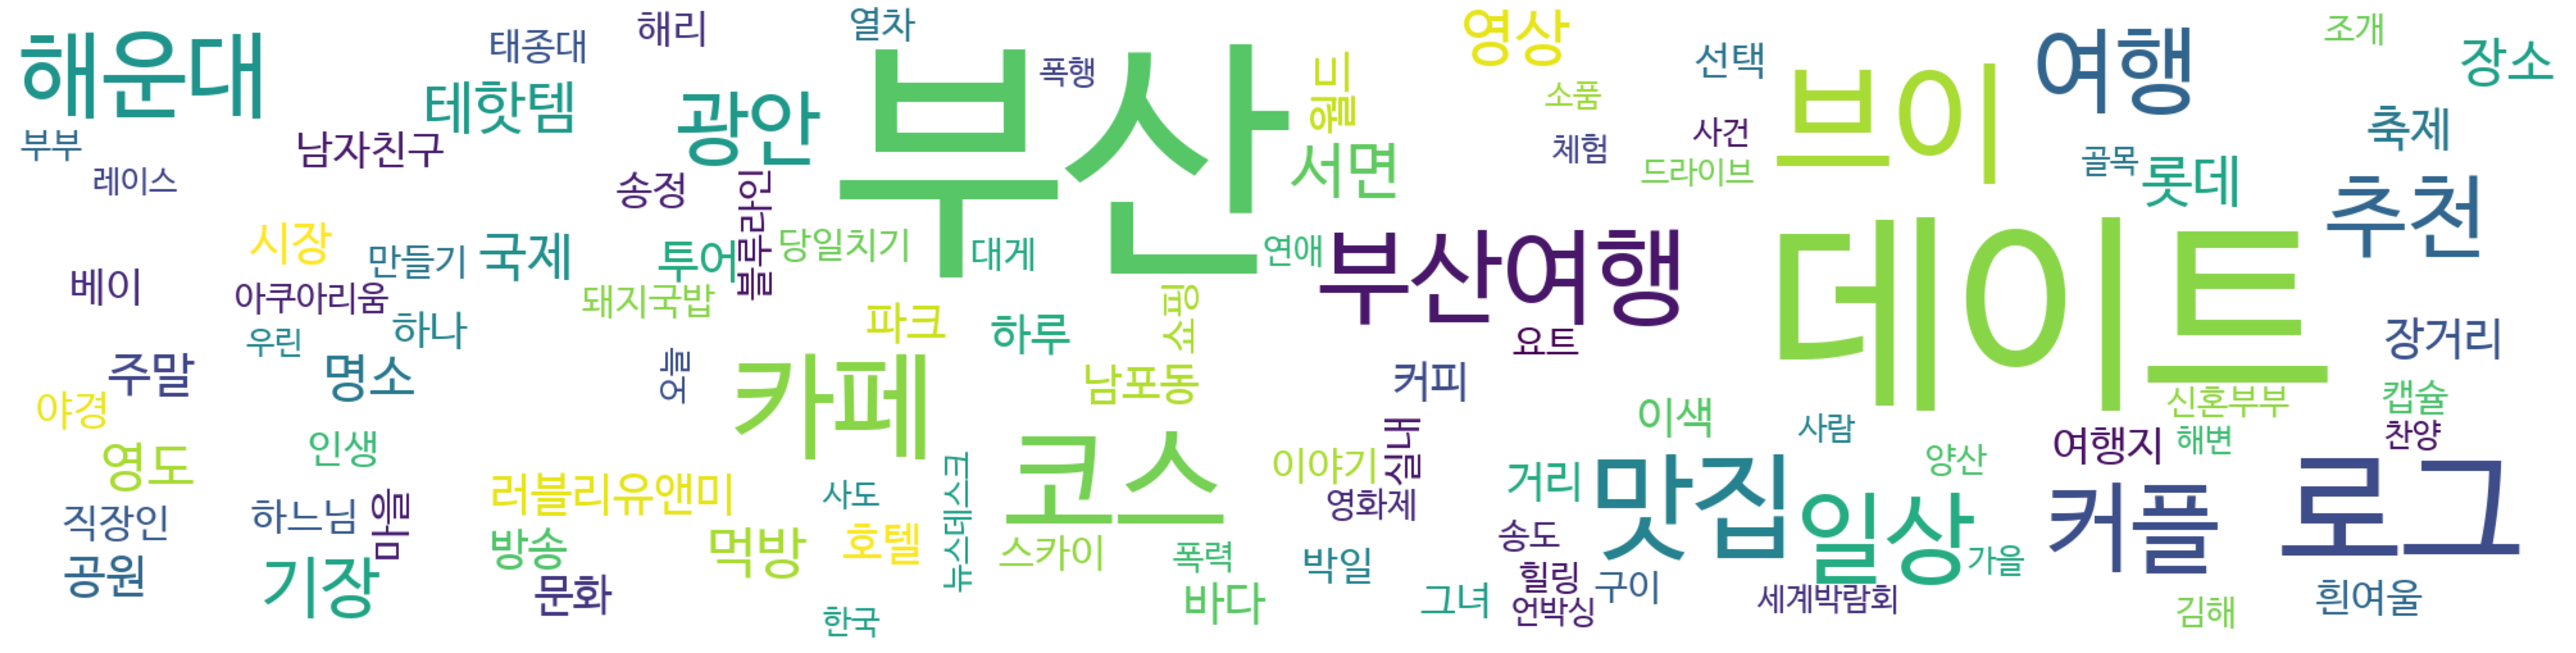

In [26]:
#wordcloud 만들기
wc = WordCloud(max_font_size=200,
	font_path = font_path,
	background_color="white",
    width=2000, height=500).generate_from_frequencies(dict(count))
    # font 경로 개별적으로 설정해야함

plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()